# Understanding and Predicting Suicide Clusters through Data Analysis and Machine Learning Techniques.

“Suicide is one of the leading causes of death among all American adults and rates are increasing in both men and women” (SSM Health).

##### This project seeks to explore the underlying factors. We will use a sample of 44,000 data points gathered from 141 different countries, between the 80’s to 2016.



###### Research Question

- Which year has the most suicides ? Which year has the least suicides?
- Which country has the most suicides ? Which country has the least suicides?
-Are certain age groups more inclined to suicide?
- What is the relationship between gender and the number of suicides?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data= pd.read_csv(r"C:\Users\Saloni Sinha\Desktop\who_suicide_statistics.csv")

In [3]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
data.shape

(43776, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [7]:
data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

###### We have 2,256 missing data from suicide_no & 5460 missing data from population.

In [8]:
data= data.fillna(0)
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [9]:
data["age"].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [10]:
data["country"].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [11]:
data["country"].nunique()

141

In [12]:
data["year"].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [13]:
data.describe()

,year,suicides_no,population
count,43776.000000,43776.000000,4.377600e+04
mean,1998.502467,183.352865,1.456536e+06
std,10.338711,780.857898,3.456217e+06
min,1979.000000,0.000000,0.000000e+00
25%,1990.000000,0.000000,2.520000e+04
50%,1999.000000,11.000000,2.979955e+05
75%,2007.000000,83.000000,1.067009e+06
max,2016.000000,22338.000000,4.380521e+07


In [14]:
data['suicides_no'] = data['suicides_no'].replace(0, np.NaN)
print(data.head(10))

   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0
5  Albania  1985  female    75+ years          NaN     34200.0
6  Albania  1985    male  15-24 years          NaN    301400.0
7  Albania  1985    male  25-34 years          NaN    264200.0
8  Albania  1985    male  35-54 years          NaN    296700.0
9  Albania  1985    male   5-14 years          NaN    325800.0


In [15]:
mean_value = data['suicides_no'].mean()

# Fills the NaN values in the 'suicides_no' column with the mean value
data['suicides_no'] = data['suicides_no'].fillna(mean_value)

# Print the first 10 rows of the dataframe to verify the replacement
print(data.head(10))

   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years   249.106328    277900.0
1  Albania  1985  female  25-34 years   249.106328    246800.0
2  Albania  1985  female  35-54 years   249.106328    267500.0
3  Albania  1985  female   5-14 years   249.106328    298300.0
4  Albania  1985  female  55-74 years   249.106328    138700.0
5  Albania  1985  female    75+ years   249.106328     34200.0
6  Albania  1985    male  15-24 years   249.106328    301400.0
7  Albania  1985    male  25-34 years   249.106328    264200.0
8  Albania  1985    male  35-54 years   249.106328    296700.0
9  Albania  1985    male   5-14 years   249.106328    325800.0


In [16]:
def find_minmax(x):
    # Finds the index of the row with the lowest value in the given column
    min_index = data[x].idxmin()
    # Finds the index of the row with the highest value in the given column
    max_index = data[x].idxmax()
    
    # Creates a dataframe with the row that contains the lowest value
    low = pd.DataFrame(data.loc[min_index,:])
    # Creates a dataframe with the row that contains the highest value
    high = pd.DataFrame(data.loc[max_index,:])
    
    # Prints the year which has the highest and lowest values for the given column
    print("Year Which Has Highest "+ x + " : ",data['year'][max_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    
    # Concatenates the low and high dataframes horizontally and returns the resulting dataframe
    return pd.concat([high, low], axis=1)

# Calls the find_minmax() function with the 'suicides_no' column as an argument
find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200.0,35600.0


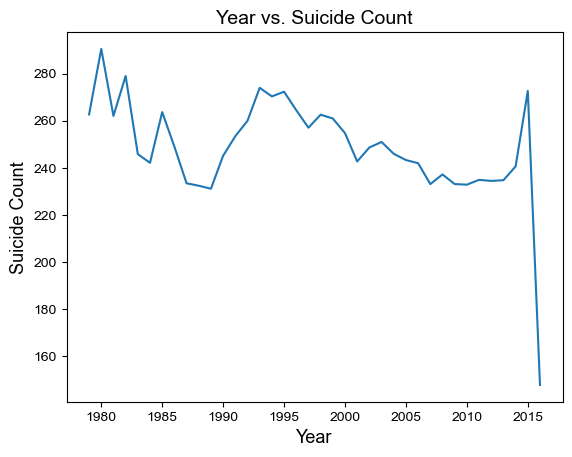

In [17]:
# year-wise analysis of mean number sucidies of each year
data.groupby('year')['suicides_no'].mean().plot()  

# setup the title and labels of the figure.
plt.title("Year vs. Suicide Count", fontsize=14) 
plt.xlabel('Year', fontsize=13); 
plt.ylabel('Suicide Count', fontsize=13)  

# setup the figure size and style.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")


###### Observing our Time Series Line Plot, we can see a sharp drop in suicides in 1985. 

### Which country has the most Suicides ? Which country has the least Suicides ?

In [18]:
# Group data by country and calculate total suicides
suicide_by_country = data.groupby('country')['suicides_no'].sum()

# Sort countries by suicide count in descending order
most_suicides = suicide_by_country.sort_values(ascending=False).head(1)
least_suicides = suicide_by_country.sort_values().head(1)

print("Country with the most suicides: ", most_suicides.index[0])
print("Country with the least suicides: ", least_suicides.index[0])


Country with the most suicides:  Russian Federation
Country with the least suicides:  Zimbabwe


#### Feature Engineering

In [19]:
# Create new column for Suicide per Population Size Ratio
data['suicides_per_pop'] = data['suicides_no'] / data['population'] * 1000000


In [20]:
data["suicides_per_pop"].head()

0     896.388371
1    1009.344928
2     931.238610
3     835.086585
4    1796.008134
Name: suicides_per_pop, dtype: float64

In [21]:
# Calculate suicide per population size ratio
data['suicides_per_pop'] = data['suicides_no'] / data['population'] * 100000

# Print head with all columns
print(data.head())


   country  year     sex          age  suicides_no  population  \
0  Albania  1985  female  15-24 years   249.106328    277900.0   
1  Albania  1985  female  25-34 years   249.106328    246800.0   
2  Albania  1985  female  35-54 years   249.106328    267500.0   
3  Albania  1985  female   5-14 years   249.106328    298300.0   
4  Albania  1985  female  55-74 years   249.106328    138700.0   

   suicides_per_pop  
0         89.638837  
1        100.934493  
2         93.123861  
3         83.508658  
4        179.600813  


In [22]:
find_minmax("suicides_per_pop")

Year Which Has Highest suicides_per_pop :  1983
Year Which Has Lowest suicides_per_pop  :  2005


,372,12993
country,Anguilla,Egypt
year,1983,2005
sex,female,male
age,15-24 years,5-14 years
suicides_no,249.106328,1.0
population,0.0,9543088.0
suicides_per_pop,inf,0.010479


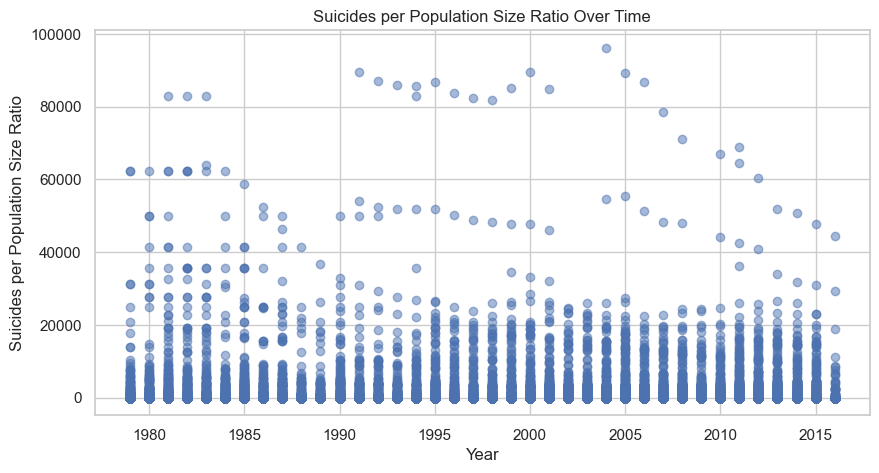

In [27]:
plt.scatter(data['year'], data['suicides_per_pop'], alpha=0.5)

# Set the x and y labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per Population Size Ratio')
plt.title('Suicides per Population Size Ratio Over Time')

# Show the plot
plt.show()

##### Are certain age groups more inclined to suicide?


In [24]:
sample = data.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicides_per_pop
31184,Qatar,2004,male,35-54 years,14.0,190116.0,7.363925
15430,Georgia,2006,male,55-74 years,16.0,335050.0,4.775407
2533,Australia,2010,female,25-34 years,94.0,1579905.0,5.949725


In [25]:
data['AgeNum'] = data['age'].str[:2]
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(5)



43771    25
43772    35
43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [28]:
# Define the age bins and labels
age_bins = [0, 18, 30, 60, float('inf')]
age_labels = ['Adolescent', 'Adults', 'Middle_Aged_Adults', 'Elderly']

# Create the 'AgeCategory' column using cut function
data['AgeCategory'] = pd.cut(data['AgeNum'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Convert it back to type string
data['AgeCategory'] = data['AgeCategory'].astype(str)

# Display the last 3 rows of 'AgeCategory' column
print(data['AgeCategory'].tail(3))


43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object


In [29]:
data['AgeNum'] .tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [30]:
data.head(5)

,country,year,sex,age,suicides_no,population,suicides_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,89.638837,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,100.934493,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,93.123861,35,Middle_Aged_Adults
3,Albania,1985,female,5-14 years,249.106328,298300.0,83.508658,5,Adolescent
4,Albania,1985,female,55-74 years,249.106328,138700.0,179.600813,55,Middle_Aged_Adults


Text(8.194444444444445, 0.5, 'Suicide Count')

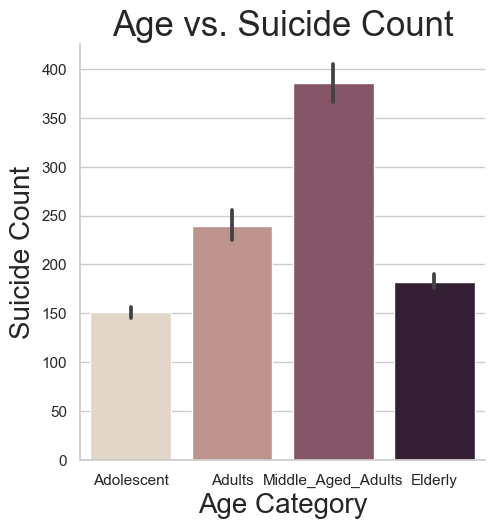

In [31]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

The following data illustrates that the middle aged adults ,between 30 to 60 have highest suicide counts

### What is the relationship between the gender and the number of suicides?

In [32]:
data['sex'].value_counts()

female    21888
male      21888
Name: sex, dtype: int64

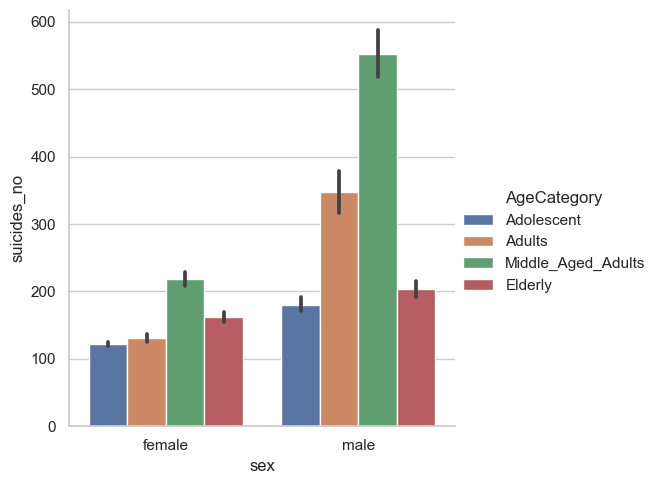

In [33]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

#### Males are more inclined to suicide.
Both genders show middle aged adults as the leading age group of suicide.

#### Machine Learning + Predictive Analytics

Use of multiple linear regression model that will be trained to understand correlation between our features and our predictors

In [37]:
newData = data[['year', 'sex', 'AgeNum', 'suicides_no']]
newData.head(3)

X = newData.iloc[:, :-1].values
y = newData.iloc[:, -1].values

X
y

array([249.10632817, 249.10632817, 249.10632817, ...,   6.        ,
        74.        ,  13.        ])

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 1.0, 1985, 15],
       [1.0, 0.0, 1.0, 1985, 25],
       [1.0, 0.0, 1.0, 1985, 35],
       ...,
       [0.0, 1.0, 0.0, 1990, 5],
       [0.0, 1.0, 0.0, 1990, 55],
       [0.0, 1.0, 0.0, 1990, 75]], dtype=object)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

### Training the Multiple Linear Regression model on the Training set

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

#### Predictions

we wish to predict the suicide count, given certain demographics.

A 50 year old male, from 2001

In [46]:
print(regressor.predict([[1,0,2001,55]]))

ValueError: X has 4 features, but LinearRegression is expecting 5 features as input.

In [51]:
print(regressor.predict([[1, 0,0,2001,55]]))


[244.28218361]


In [52]:
##Would yield a suicide count of approximately 244.



### Conclusion

The analysis indicates a decrease in suicides in the 80s, possibly due to increased awareness and recognition of mental health issues. However, a subsequent rise in suicides is observed. Russian alcohol consumption likely contributes to their high suicide rate, but limited data exists due to Soviet secrecy. Middle-aged adults have the highest suicide count, while elderly and adolescents have fewer. Suicide is a leading cause of death among American adults, with males being more prone than females. Mental health strongly predicts suicide.




